<a href="https://colab.research.google.com/github/cmsierramo/Covid_Dashboard/blob/master/Web_Dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

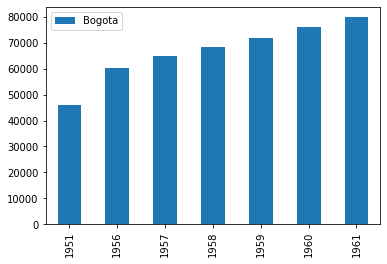

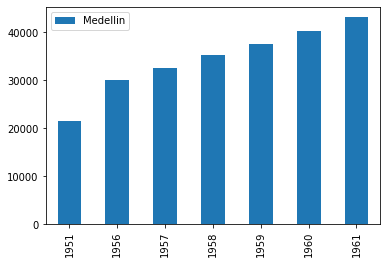

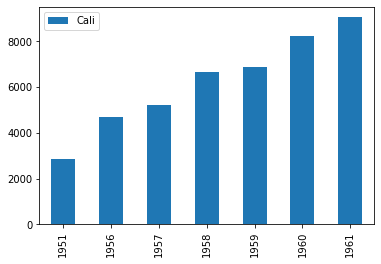

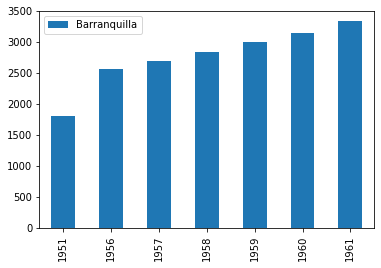

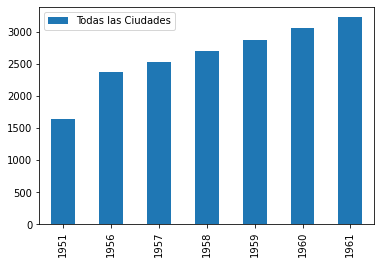

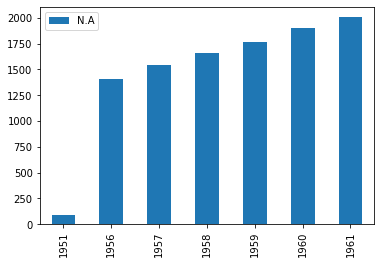

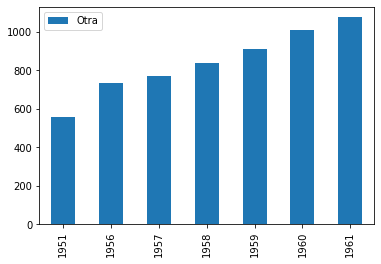

In [17]:
import pandas as pd
from datetime import date
import os

ban = 0

data = [[45939, 21574, 2876, 1815, 1646,   89,  555],
        [60423, 29990, 4708, 2568, 2366, 1411,  733],
        [64721, 32510, 5230, 2695, 2526, 1546,  773],
        [68484, 35218, 6662, 2845, 2691, 1663,  836],
        [71799, 37598, 6856, 3000, 2868, 1769,  911],
        [76036, 40341, 8220, 3145, 3054, 1905, 1008],
        [79831, 43173, 9053, 3338, 3224, 2005, 1076]]

data = pd.DataFrame(
    data = data,
    index = [1951, 1956, 1957, 1958, 1959, 1960, 1961],
    columns = ['Bogota', 'Medellin', 'Cali', 'Barranquilla', 'Todas las Ciudades', 'N.A', 'Otra']
)

filtro1_column = ['Bogota', 'Medellin', 'Cali', 'Barranquilla', 'Todas las Ciudades', 'N.A', 'Otra']
filtro2_column = ['Barras',  'Dispersion', 'Comparacion']

if os.path.isdir('Graficas'):
    ban = 1
else:
    os.mkdir('Graficas')

if os.path.isdir('templates'):
    ban = 1
else:
    os.mkdir('templates')

#GENERAMOS LAS GRAFICAS
for col in data.columns:
    fig = data.plot.bar(y=col).get_figure().savefig('Graficas/' + col + '_Barras.png')


f = open('templates/index.html','w')

mensaje = """<!DOCTYPE html>
<html lang="en">
  <head>
    <meta charset="utf-8">
    <title>COVID - DASHBOARD</title>

    <style>

        body {
          font-family: Arial, Helvetica, sans-serif;
          padding-left: 10px;
        }

        header {
            font-size: 20px;
        }

        nav {
          float: left;
          width: 20%;
          height: 100px;
          background: #eeeeee;
          padding: 20px;
        }

        .seltext {
            font-weight: bold;
        }

        .auxtext {
            font-size: 14px;
            color: #807F7F;
        }

    </style>

  </head>
  <body>

    <header>
      <h2>Seleccione la opcion deseada</h2>
    </header>

    <nav style="border:1px solid #BEBDBD; border-width:2px;">
      <p class="seltext">Filtro_1:</p>
      <select id="filtro_1" name="filtro_1"  onchange="selectPlot()">

        <!--- Genera las opciones del menu usando Jinja2 --->

        {% for i in filtro1 %}
            <option value="{{ i }}">{{ i }}</option>
        {% endfor %}

        <!--- Fin de la modificacion --->

      </select>

      <br>
      <hr>
      <p class="auxtext"> Comportamiento COVID 2020 - 2 </p>
    </nav>

     <nav style="border:1px solid #BEBDBD; border-width:2px;">
      <p class="seltext">Filtro_2:</p>
      <select id="filtro_2" name="filtro_2"  onchange="selectPlot()">

            <option value="Barras">Barras</option>
        
            <option value="Dispersion">Dispersion</option>
        
            <option value="Comparacion">Comparacion</option>

      </select>
      
      <br>
      <hr>
      <p class="auxtext"> Comportamiento COVID 2020 - 2 </p>
    </nav>

    <div>

      <!--- Genera la division de cada imagen usando Jinja2 --->

      <div class="myImage" id="Bogota_Barras" style="display:none"> <img src="Graficas/Bogota_Barras.png" alt="Bogota_Barras"> </div>

      <div class="myImage" id="Medellin_Barras" style="display:none"> <img src="Graficas/Medellin_Barras.png" alt="Medellin_Barras"> </div>

      <div class="myImage" id="Cali_Barras" style="display:none"> <img src="Graficas/Cali_Barras.png" alt="Cali_Barras"> </div>

      {% for i in filtro1 %}
        {% for j in filtro2 %}
          {% if i == filtro1[0] %}
            <div class="myImage" id="{{ i }}_{{ j }}" style="display:block"> <img src="Graficas/{{ i }}_{{ j }}.png" alt="{{ i }}_{{ j }}"> </div>
          {% else %}
            <div class="myImage" id="{{ i }}_{{ j }}" style="display:none"> <img src="Graficas/{{ i }}_{{ j }}.png" alt="{{ i }}_{{ j }}"> </div>
          {% endif %}
        {% endfor %}
      {% endfor %}

      <!--- Fin de la modificacion --->

    </div>

    <script>
      function selectPlot() {
        var filtro_1 = document.getElementById("filtro_1").value;
        var filtro_2 = document.getElementById("filtro_2").value;
        var carac = "_"
        var images = document.getElementsByClassName("myImage");
        for (var i = 0; i < images.length; i++) {
          if (images[i].id == filtro_1.concat(carac, filtro_2)) {
            images[i].style.display = "block"
          }else{
            images[i].style.display = "none"
          }
        }
      }
    </script>
  </body>
</html>"""

f.write(mensaje)
f.close()

from jinja2 import Template
str = open('templates/index.html', 'r').read()
template = Template(str)
str = template.render(filtro1=filtro1_column)
#str = template.render(filtro2=filtro2_column)
open('index.html', 'w').write(str);

#str = open('index.html', 'r').read()
#template = Template(str)
#str = template.render(filtro2=filtro2_column)
#open('index2.html', 'w').write(str);
